<a href="https://colab.research.google.com/github/dung18520632/Deep_Learning-Python-Basics/blob/main/Week2/Convolution_HappyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [5]:
def load_dataset():
    train_dataset = h5py.File('/content/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
X_train=X_train_orig/255.
X_test=X_test_orig/255.
Y_train=Y_train_orig.T
Y_test=Y_test_orig.T

In [7]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [8]:
def model(input_shape):
  X_input=Input(input_shape)
  X=ZeroPadding2D(padding=(3,3))(X_input)
  X=Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
  X=BatchNormalization(axis=3,name='bno')(X)
  X=Activation('relu')(X)
  X=MaxPooling2D((2,2),name="max_pool")(X)
  flatten_layer=Flatten()
  X=flatten_layer(X)
  X=Dense(1,activation="sigmoid",name="fc")(X)
  model=Model(inputs=X_input,outputs=X,name='HappyModel')
  return model





In [9]:
happyModel = model(X_train.shape[1:])

In [10]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])


In [11]:
happyModel.fit(X_train,Y_train,epochs=40,batch_size=50)

Epoch 1/40
12/12 [==============================] - 4s 303ms/step - loss: 3.4065 - accuracy: 0.5359
Epoch 2/40
12/12 [==============================] - 4s 298ms/step - loss: 0.7801 - accuracy: 0.7208
Epoch 3/40
12/12 [==============================] - 4s 301ms/step - loss: 0.3072 - accuracy: 0.8594
Epoch 4/40
12/12 [==============================] - 4s 295ms/step - loss: 0.2500 - accuracy: 0.8763
Epoch 5/40
12/12 [==============================] - 4s 298ms/step - loss: 0.1511 - accuracy: 0.9388
Epoch 6/40
12/12 [==============================] - 4s 297ms/step - loss: 0.1016 - accuracy: 0.9736
Epoch 7/40
12/12 [==============================] - 4s 296ms/step - loss: 0.1118 - accuracy: 0.9546
Epoch 8/40
12/12 [==============================] - 4s 295ms/step - loss: 0.1016 - accuracy: 0.9681
Epoch 9/40
12/12 [==============================] - 4s 296ms/step - loss: 0.0842 - accuracy: 0.9851
Epoch 10/40
12/12 [==============================] - 4s 296ms/step - loss: 0.0702 - accuracy: 0.9807

In [13]:
pred=happyModel.evaluate(X_test,Y_test,batch_size=32)
print("",pred[0])
print(pred[1])

5/5 [==============================] - 0s 52ms/step - loss: 0.1115 - accuracy: 0.9733
 0.11152806878089905
0.9733333587646484


In [18]:
img_path="/content/6054.png_860.png"
img=image.load_img(img_path,target_size=(64,64))
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
x = preprocess_input(X)
print("",happyModel.predict(X))


 [[1.]]


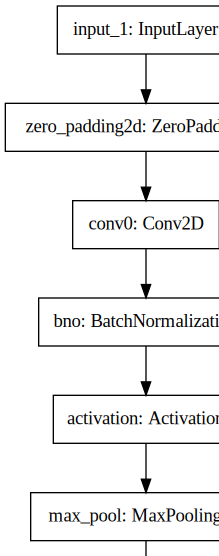

In [19]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))